In [18]:
#Upload csv excel file
import pandas as pd
data = pd.read_csv('/dshome/WoongLab/heo/oil_kamp/Data/melting_tank.csv') 
data.shape

(835200, 7)

In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix 

In [20]:
from sklearn.ensemble import RandomForestClassifier 

In [33]:
#Select X, Y
# 인덱스를 의미하는 Num 컬럼과 시간을 나타내는 STD_DT 컬럼을 제거하기 
X = data.drop(['STD_DT','NUM','TAG'],axis=1)
y = data[['TAG']]

In [34]:
X

,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,489,116,631,3.19
1,433,78,609,3.19
2,464,154,608,3.19
3,379,212,606,3.19
4,798,1736,604,3.21
...,...,...,...,...
835195,755,1743,318,3.21
835196,385,206,317,3.19
835197,465,148,316,3.20
835198,467,0,314,3.19


In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)
print(y)

[1 1 1 ... 1 1 1]


/dshome/WoongLab/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
pd.DataFrame(np.array(y)).value_counts()

1    658133
0    177067
dtype: int64

In [39]:
#Prepare training 70% and test data 30%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [40]:
model=RandomForestClassifier(random_state=42)

In [41]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
feature_names=X.columns.tolist()
print(feature_names)

['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP']


<AxesSubplot: >

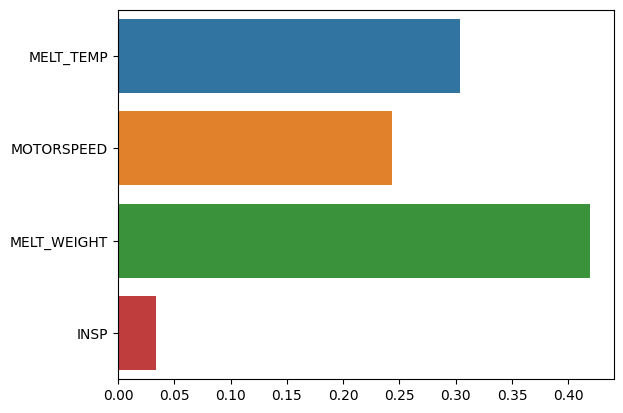

In [43]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [45]:
X_train.to_csv('/dshome/WoongLab/heo/oil_kamp/Data/X_train.csv',index=False)
X_test.to_csv('/dshome/WoongLab/heo/oil_kamp/Data/X_test.csv',index=False)
pd.DataFrame(y_train).to_csv('/dshome/WoongLab/heo/oil_kamp/Data/y_train.csv',index=False)
pd.DataFrame(y_test).to_csv('/dshome/WoongLab/heo/oil_kamp/Data/y_test.csv',index=False)
